In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.vector_ar.var_model import VAR
from matplotlib.figure import Figure

In [44]:
df = pd.read_csv('stock_data(5y).csv')
df.head(10)

,Date,Open,High,Low,Close,Volume,Change,Code,Name,MA_5,fast_%K,slow_%K,slow_%D,RSI,STD,Upper,Lower
0,2018-01-02,335000,341000,332500,339000,153013,0.019549,5490,포스코,336500.0,83.333333,68.177419,66.786022,59.139785,4508.471558,345516.943116,327483.056884
1,2018-01-03,347000,358500,346500,357500,485812,0.054572,5490,포스코,340600.0,96.610169,71.499453,69.985912,69.841270,6796.864602,354193.729204,327006.270796
2,2018-01-04,362000,370000,361000,367500,416948,0.027972,5490,포스코,346200.0,93.902439,72.215425,70.716094,74.482759,9914.768357,366029.536715,326370.463285
3,2018-01-05,369000,369500,365500,368000,205202,0.001361,5490,포스코,352900.0,95.121951,79.626912,71.805992,73.758865,12030.225093,376960.450186,328839.549814
4,2018-01-08,370000,374000,363500,369500,206165,0.004076,5490,포스코,360300.0,89.156627,91.624904,76.628823,78.676471,13874.887387,388049.774774,332550.225226
5,2018-01-09,372500,377500,371500,377500,229700,0.021651,5490,포스코,368000.0,100.000000,94.958237,81.984986,80.136986,16110.208434,400220.416868,335779.583132
6,2018-01-10,375000,383000,370000,372500,208474,-0.013245,5490,포스코,371000.0,52.272727,86.090749,84.903245,82.978723,17233.897900,405467.795801,336532.204199
7,2018-01-11,369000,371500,363000,366500,210191,-0.016107,5490,포스코,370800.0,17.500000,70.810261,84.622213,76.158940,17702.568205,406205.136410,335394.863590
8,2018-01-12,373500,389500,373000,386500,295131,0.054570,5490,포스코,374500.0,88.679245,69.521720,82.601174,79.775281,19567.023817,413634.047634,335365.952366
9,2018-01-15,387000,387500,377500,380500,186265,-0.015524,5490,포스코,376700.0,66.037736,64.897942,77.255782,73.770492,20515.334444,417730.668889,335669.331111


In [46]:
# 삼성전자 주가 데이터 추출
samsung_df = df[df['Name'] == '삼성전자']
samsung_df

,Date,Open,High,Low,Close,Volume,Change,Code,Name,MA_5,fast_%K,slow_%K,slow_%D,RSI,STD,Upper,Lower
1325,2018-01-02,51380,51400,50780,51020,169485,0.001177,5930,삼성전자,49848.0,88.125000,47.469399,28.124276,45.224172,1004.052316,51856.104631,47839.895369
1326,2018-01-03,52540,52560,51420,51620,200270,0.011760,5930,삼성전자,50232.0,78.440367,59.130627,34.364068,49.248120,1022.506724,52277.013447,48186.986553
1327,2018-01-04,52120,52180,50640,51080,233909,-0.010461,5930,삼성전자,50808.0,63.902439,71.911114,44.705412,45.303867,1016.836684,52841.673368,48774.326632
1328,2018-01-05,51300,52120,51200,52120,189623,0.020360,5930,삼성전자,51360.0,85.620915,82.518444,58.228488,53.597122,1055.603594,53471.207188,49248.792812
1329,2018-01-08,52400,52520,51500,52020,167673,-0.001919,5930,삼성전자,51572.0,71.875000,77.592744,67.724466,54.379562,1070.063451,53712.126902,49431.873098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2645,2023-05-11,64700,65100,64200,64200,11648905,-0.006192,5930,삼성전자,65020.0,0.000000,37.500000,59.269231,41.772152,663.245608,66346.491217,63693.508783
2646,2023-05-12,63700,64600,63600,64100,8693913,-0.001558,5930,삼성전자,64820.0,18.518519,29.203704,51.325356,42.307692,677.048548,66174.097097,63465.902903
2647,2023-05-15,64100,64600,63900,64500,8172021,0.006240,5930,삼성전자,64540.0,40.909091,22.385522,41.017845,42.307692,645.857243,65831.714487,63248.285513
2648,2023-05-16,65800,65900,65300,65400,12334657,0.013953,5930,삼성전자,64560.0,78.260870,30.537696,34.225384,51.219512,651.395264,65862.790527,63257.209473


In [47]:
# Date를 인덱스로 변경
samsung_df.set_index('Date', inplace=True)
samsung_df.head()

,Open,High,Low,Close,Volume,Change,Code,Name,MA_5,fast_%K,slow_%K,slow_%D,RSI,STD,Upper,Lower
Date,,,,,,,,,,,,,,,,
2018-01-02,51380,51400,50780,51020,169485,0.001177,5930,삼성전자,49848.0,88.125000,47.469399,28.124276,45.224172,1004.052316,51856.104631,47839.895369
2018-01-03,52540,52560,51420,51620,200270,0.011760,5930,삼성전자,50232.0,78.440367,59.130627,34.364068,49.248120,1022.506724,52277.013447,48186.986553
2018-01-04,52120,52180,50640,51080,233909,-0.010461,5930,삼성전자,50808.0,63.902439,71.911114,44.705412,45.303867,1016.836684,52841.673368,48774.326632
2018-01-05,51300,52120,51200,52120,189623,0.020360,5930,삼성전자,51360.0,85.620915,82.518444,58.228488,53.597122,1055.603594,53471.207188,49248.792812
2018-01-08,52400,52520,51500,52020,167673,-0.001919,5930,삼성전자,51572.0,71.875000,77.592744,67.724466,54.379562,1070.063451,53712.126902,49431.873098


In [48]:
# Close 추출
close = samsung_df['Close']

# 비교 기준 구간
start_date = '2023-04-17'
end_date = '2023-05-17'

<Axes: xlabel='Date'>

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

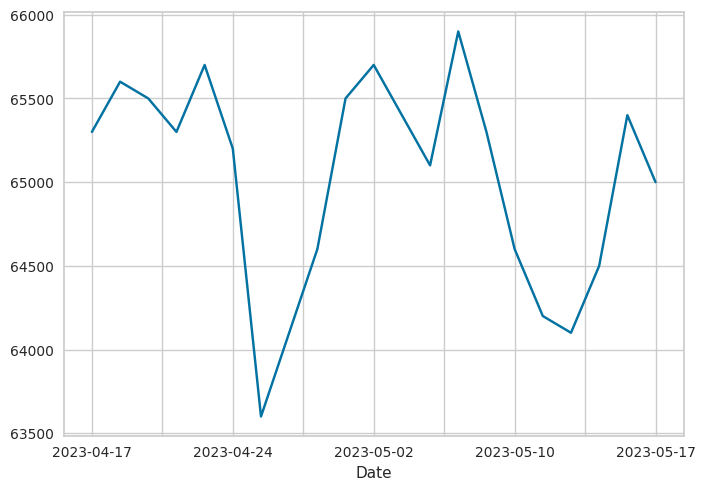

In [49]:
plt.rcParams['font.family'] = 'NanumGothic'
#plt.figure(figsize=(12, 6))
close[start_date:end_date].plot()

In [50]:
base = close[start_date:end_date]
base

Date
2023-04-17    65300
2023-04-18    65600
2023-04-19    65500
2023-04-20    65300
2023-04-21    65700
2023-04-24    65200
2023-04-25    63600
2023-04-26    64100
2023-04-27    64600
2023-04-28    65500
2023-05-02    65700
2023-05-03    65400
2023-05-04    65100
2023-05-08    65900
2023-05-09    65300
2023-05-10    64600
2023-05-11    64200
2023-05-12    64100
2023-05-15    64500
2023-05-16    65400
2023-05-17    65000
Name: Close, dtype: int64

In [51]:
base_norm = (base-base.min()) / (base.max() - base.min())
base_norm

Date
2023-04-17    0.739130
2023-04-18    0.869565
2023-04-19    0.826087
2023-04-20    0.739130
2023-04-21    0.913043
2023-04-24    0.695652
2023-04-25    0.000000
2023-04-26    0.217391
2023-04-27    0.434783
2023-04-28    0.826087
2023-05-02    0.913043
2023-05-03    0.782609
2023-05-04    0.652174
2023-05-08    1.000000
2023-05-09    0.739130
2023-05-10    0.434783
2023-05-11    0.260870
2023-05-12    0.217391
2023-05-15    0.391304
2023-05-16    0.782609
2023-05-17    0.608696
Name: Close, dtype: float64

In [52]:
window_size = len(base)

# 예측 기간
next_date = 5

# 검색 횟수
moving_cnt = len(close) - window_size - next_date - 1

print(moving_cnt)

1298


In [53]:
def cosine_similarity(x, y):
    return np.dot(x, y) / (np.sqrt(np.dot(x, x)) * np.sqrt(np.dot(y, y)))

In [13]:
# 유사도 저장 딕셔너리
sim_list = []

for i in range(moving_cnt):
    target = close[i:i+window_size]

    # Normarlize
    target_norm = (target-target.min()) / (target.max() - target.min())

    # 코사인 유사도 저장
    cos_similarity = cosine_similarity(base_norm, target_norm)

    # 코사인 유사도 <- i(인덱스), 시계열 데이터 함께 저장
    sim_list.append(cos_similarity)

In [14]:
pd.Series(sim_list).sort_values(ascending=False).head(20)

1066    0.944933
537     0.936161
678     0.935905
1056    0.933670
138     0.931909
679     0.927639
998     0.926887
997     0.923978
1067    0.922834
1057    0.920882
595     0.920231
1055    0.919207
811     0.918096
775     0.916653
632     0.916192
1127    0.915363
1065    0.913150
328     0.912033
8       0.911566
182     0.910424
dtype: float64

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

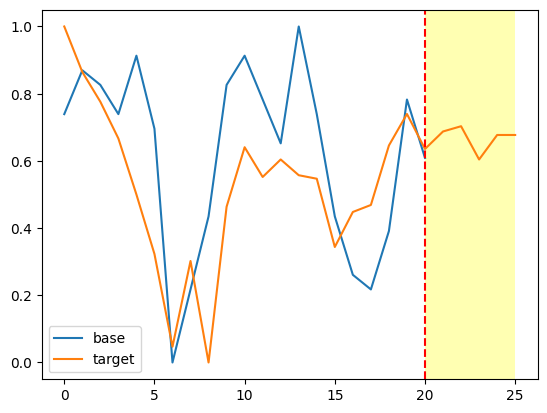

In [15]:
idx = 537

top_ = close[idx:idx+window_size + next_date]
top_norm = (top_ - top_.min())  / (top_.max() - top_.min())
plt.plot(base_norm.values, label = 'base')
plt.plot(top_norm.values, label = 'target')
plt.axvline(x = len(base_norm) - 1, c= 'r', linestyle = '--')
plt.axvspan(len(base_norm.values)-1, len(top_norm.values)-1, facecolor = 'yellow', alpha = 0.3)
plt.legend()
plt.show()

In [54]:
import matplotlib
matplotlib.matplotlib_fname()

'c:\\Users\\king\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'

In [55]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()

# 정규화할 칼럼 선택
columns_to_normalize = ['Close', 'Volume', 'MA_5', 'fast_%K', 'slow_%K', 'slow_%D', 'RSI']

# 선택한 칼럼 정규화
samsung_df[columns_to_normalize] = scaler.fit_transform(samsung_df[columns_to_normalize])

In [56]:
samsung_df.head()

,Open,High,Low,Close,Volume,Change,Code,Name,MA_5,fast_%K,slow_%K,slow_%D,RSI,STD,Upper,Lower
Date,,,,,,,,,,,,,,,,
2018-01-02,51380,51400,50780,0.253408,0.001877,0.001177,5930,삼성전자,0.226085,0.881250,0.472345,0.252473,0.486017,1004.052316,51856.104631,47839.895369
2018-01-03,52540,52560,51420,0.264613,0.002218,0.011760,5930,삼성전자,0.233494,0.784404,0.593968,0.320576,0.532208,1022.506724,52277.013447,48186.986553
2018-01-04,52120,52180,50640,0.254528,0.002590,-0.010461,5930,삼성전자,0.244607,0.639024,0.727266,0.433446,0.486932,1016.836684,52841.673368,48774.326632
2018-01-05,51300,52120,51200,0.273950,0.002100,0.020360,5930,삼성전자,0.255258,0.856209,0.837898,0.581042,0.582130,1055.603594,53471.207188,49248.792812
2018-01-08,52400,52520,51500,0.272082,0.001857,-0.001919,5930,삼성전자,0.259348,0.718750,0.786524,0.684684,0.591112,1070.063451,53712.126902,49431.873098


In [61]:
#5일 치 등락률 생성하고 라벨링
samsung_df['5days'] = round((samsung_df['Close'] / samsung_df['Close'].shift(5) - 1) * 100,2)
samsung_df['day5_label'] = samsung_df['5days'].apply(lambda x: 'maintain' if abs(x) < 5 else 'buy' if x >= 5 else 'sell')
samsung_df=samsung_df.dropna(axis=0)

In [62]:
samsung_df['day5_label'].value_counts()

maintain    547
buy         411
sell        362
Name: day5_label, dtype: int64

In [63]:
samsung_df.head()

,Open,High,Low,Close,Volume,Change,Code,Name,MA_5,fast_%K,slow_%K,slow_%D,RSI,STD,Upper,Lower,5days,day5_label
Date,,,,,,,,,,,,,,,,,,
2018-01-09,51460,51720,49980,0.241830,0.003989,-0.031142,5930,삼성전자,0.256955,0.162791,0.636657,0.719074,0.530438,1075.825754,53599.651508,49296.348492,-4.57,maintain
2018-01-10,50500,50520,48640,0.212698,0.004112,-0.030952,5930,삼성전자,0.246228,0.051546,0.483786,0.696013,0.437598,1137.152029,53166.304058,48617.695942,-19.62,sell
2018-01-11,48200,49260,48020,0.201494,0.005564,-0.012285,5930,삼성전자,0.235269,0.048889,0.360687,0.619291,0.398210,1239.157609,52802.315217,47845.684783,-20.84,sell
2018-01-12,48240,48480,46760,0.200747,0.006040,-0.000829,5930,삼성전자,0.220143,0.250000,0.234235,0.492948,0.419912,1291.792309,52123.584617,46956.415383,-26.72,sell
2018-01-15,48800,48980,47920,0.207096,0.002236,0.007054,5930,삼성전자,0.206714,0.358871,0.159166,0.361647,0.510417,1333.864982,51511.729963,46176.270037,-23.88,sell


In [22]:
from statsmodels.tsa.stattools import adfuller

In [23]:
#columns4 부터하는 이유는 날짜, day등등 필요없는거 제거하기 위함.
var_list=[]
for col in samsung_df.columns[3:]:
    if col == 'Name' or col == 'Code' or col == 'date':
      continue
    df= pd.concat([samsung_df['5days'],samsung_df[col]],axis=1)
    corr=df.corr()
    if len(corr) == 2 and abs(corr.iloc[0,1]) != 1 :
        print("변수 이름 : ",corr.columns[1])
        print("상관계수 : ",corr.iloc[0,1])
        var_list.append(col)
        df=df.dropna(axis=0)
        adfuller_test = adfuller(df[col], autolag= "AIC")
        print("ADF test statistic: {}".format(adfuller_test[0]))
        print("p-value: {}".format(adfuller_test[1]))
        print("-----------------------------------------")

변수 이름 :  Close
상관계수 :  -0.03748575856999486
ADF test statistic: -1.3683507187321322
p-value: 0.5973516555540512
-----------------------------------------
변수 이름 :  Volume
상관계수 :  -0.00885728699293237
ADF test statistic: -5.645112052414162
p-value: 1.0155444991177209e-06
-----------------------------------------
변수 이름 :  Change
상관계수 :  0.15146408533842023
ADF test statistic: -36.37914424420612
p-value: 0.0
-----------------------------------------
변수 이름 :  MA_5
상관계수 :  -0.05793654481782235
ADF test statistic: -1.4794347662552136
p-value: 0.5436590319258457
-----------------------------------------
변수 이름 :  fast_%K
상관계수 :  0.27577560006044066
ADF test statistic: -12.1739633530218
p-value: 1.4000103265964403e-22
-----------------------------------------
변수 이름 :  slow_%K
상관계수 :  0.27988708110345756
ADF test statistic: -7.473652156934321
p-value: 4.9787715525994066e-11
-----------------------------------------
변수 이름 :  slow_%D
상관계수 :  0.1413060699159774
ADF test statistic: -7.402634608098939

C:\Users\king\AppData\Local\Temp\ipykernel_9340\2495224914.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


In [24]:
var_list=['Close', 'Volume', 'MA_5', 'fast_%K', 'slow_%K', 'slow_%D', 'RSI']

In [26]:
import warnings
warnings.filterwarnings( 'ignore' )

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import TimeSeriesSplit
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.utils import class_weight
from sklearn.preprocessing import MinMaxScaler

In [30]:
var_list=['Close', 'fast_%K', 'Volume', 'MA_5']

In [58]:
features = ['MA_5', 'Close', 'Volume', 'fast_%K', 'slow_%K', 'slow_%D', 'RSI']
data = samsung_df[features]

In [64]:
samsung_df.head()

,Open,High,Low,Close,Volume,Change,Code,Name,MA_5,fast_%K,slow_%K,slow_%D,RSI,STD,Upper,Lower,5days,day5_label
Date,,,,,,,,,,,,,,,,,,
2018-01-09,51460,51720,49980,0.241830,0.003989,-0.031142,5930,삼성전자,0.256955,0.162791,0.636657,0.719074,0.530438,1075.825754,53599.651508,49296.348492,-4.57,maintain
2018-01-10,50500,50520,48640,0.212698,0.004112,-0.030952,5930,삼성전자,0.246228,0.051546,0.483786,0.696013,0.437598,1137.152029,53166.304058,48617.695942,-19.62,sell
2018-01-11,48200,49260,48020,0.201494,0.005564,-0.012285,5930,삼성전자,0.235269,0.048889,0.360687,0.619291,0.398210,1239.157609,52802.315217,47845.684783,-20.84,sell
2018-01-12,48240,48480,46760,0.200747,0.006040,-0.000829,5930,삼성전자,0.220143,0.250000,0.234235,0.492948,0.419912,1291.792309,52123.584617,46956.415383,-26.72,sell
2018-01-15,48800,48980,47920,0.207096,0.002236,0.007054,5930,삼성전자,0.206714,0.358871,0.159166,0.361647,0.510417,1333.864982,51511.729963,46176.270037,-23.88,sell


In [65]:
# "sell", "maintain", "buy"를 숫자로 매핑하는 사전 생성
label_mapping = {"sell": -1, "maintain": 0, "buy": 1}

# day5_label을 숫자로 변환
samsung_df['day5_label'] = samsung_df['day5_label'].replace(label_mapping)

In [67]:
# float형 변환
data[features] = data[features].astype(float)

In [68]:
from pycaret.classification import setup

# 데이터프레임과 타겟 변수를 입력으로 설정
data = samsung_df  # 데이터프레임
target = 'day5_label'  # 타겟 변수

# 데이터 설정
setup(data=data, target=target)

ValueError: Input X contains infinity or a value too large for dtype('float64').

In [69]:
from pycaret.classification import compare_models

# 다양한 분류 모델 비교
best_model = compare_models()

RuntimeError: This function/method requires the users to run setup() first.
More info: https://pycaret.gitbook.io/docs/get-started/quickstart

In [32]:
from pycaret.classification import setup, compare_models, tune_model

In [33]:
tuned_model = tune_model(best_model, optimize='Accuracy')

NameError: name 'best_model' is not defined

In [70]:
features = ['MA_5', 'Close', 'Volume', 'fast_%K', 'slow_%K', 'slow_%D', 'RSI']
data = samsung_df[features]
data[features] = data[features].astype(float)

In [71]:
print(data.dtypes)

MA_5       float64
Close      float64
Volume     float64
fast_%K    float64
slow_%K    float64
slow_%D    float64
RSI        float64
dtype: object


In [72]:
new_data = data[["MA_5", "Close", "Volume", "fast_%K", "slow_%K", "slow_%D", "RSI"]]

In [75]:
from pycaret.regression import *

# 데이터 설정
data = samsung_df[features + ['day5_label']]  # features와 day5_label 선택

# PyCaret 설정
s = setup(data, target='day5_label', session_id=123)

# xgboost 모델 생성
xgboost = create_model('xgboost')

# xgboost 모델 튜닝
tuned_xgboost = tune_model('xgboost', optimize='Accuracy')

# 모델 학습 결과 확인
print(tuned_xgboost)

# 새로운 데이터에 대한 예측
predictions = predict_model(tuned_xgboost, data=new_data)

,Description,Value
0,Session id,123
1,Target,day5_label
2,Target type,Regression
3,Original data shape,"(1320, 8)"
4,Transformed data shape,"(1320, 8)"
5,Transformed train set shape,"(923, 8)"
6,Transformed test set shape,"(397, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2941,0.1862,0.4315,0.7136,0.2755,0.2633
1,0.2828,0.1672,0.4089,0.6987,0.2517,0.3098
2,0.3235,0.2259,0.4753,0.6029,0.2834,0.2926
3,0.2581,0.1615,0.4019,0.7345,0.2615,0.2539
4,0.3124,0.1828,0.4275,0.6911,0.2820,0.3280
5,0.2983,0.1736,0.4167,0.7370,0.2635,0.2776
6,0.2494,0.1347,0.3670,0.7456,0.2561,0.2008
7,0.3187,0.1930,0.4393,0.7088,0.2887,0.3051
8,0.3696,0.2412,0.4912,0.6147,0.3143,0.3234


TypeError: The behavior of tune_model in version 1.0.1 is changed. Please pass trained model object.

In [74]:
from pycaret.classification import *

# 데이터 설정
data = samsung_df[features + [' ']]  # features와 day5_label 선택

# PyCaret 설정
s = setup(data, target='day5_label', session_id=123)

# Random Forest Classifier 모델 생성 및 학습
rf_model = create_model('rf')

# 모델 훈련 결과 확인
print(rf_model)

# 새로운 데이터에 대한 예측
new_data = samsung_df[features].copy()  # 예측할 데이터의 features 선택
predictions = predict_model(rf_model, data=new_data)

# 모델 저장
save_model(rf_model, 'rf_model')

,Description,Value
0,Session id,123
1,Target,day5_label
2,Target type,Multiclass
3,Target mapping,"-1: 0, 0: 1, 1: 2"
4,Original data shape,"(1320, 8)"
5,Transformed data shape,"(1320, 8)"
6,Transformed train set shape,"(923, 8)"
7,Transformed test set shape,"(397, 8)"
8,Numeric features,7
9,Preprocess,True


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8602,0.9504,0.8602,0.8641,0.8606,0.7859,0.7876
1,0.8172,0.9475,0.8172,0.8255,0.8184,0.7192,0.7220
2,0.7634,0.8853,0.7634,0.7634,0.7634,0.6403,0.6403
3,0.7391,0.8992,0.7391,0.7388,0.7358,0.6070,0.6098
4,0.8152,0.9393,0.8152,0.8193,0.8160,0.7169,0.7178
5,0.7935,0.9195,0.7935,0.7996,0.7947,0.6825,0.6842
6,0.8261,0.9486,0.8261,0.8268,0.8263,0.7345,0.7347
7,0.8152,0.9479,0.8152,0.8227,0.8104,0.7229,0.7309
8,0.8696,0.9494,0.8696,0.8708,0.8696,0.7999,0.8003


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\king\AppData\Local\Temp\joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['MA_5', 'Close', 'Volume',
                                              'fast_%K', 'slow_%K', 'slow_%D',
                                              'RSI'],
                                     transformer=SimpleImputer(add_indicator=...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='sqrt',
                                         max_leaf_nodes=None, max_samples=None,
                                         min_i

In [79]:
df = pd.DataFrame(predictions)
df.head(10)

,MA_5,Close,Volume,fast_%K,slow_%K,slow_%D,RSI,prediction_label,prediction_score
Date,,,,,,,,,
2018-01-09,0.256955,0.241830,0.003989,0.162791,0.636657,0.719074,0.530438,0,0.58
2018-01-10,0.246228,0.212698,0.004112,0.051546,0.483786,0.696013,0.437598,-1,0.95
2018-01-11,0.235269,0.201494,0.005564,0.048889,0.360687,0.619291,0.398210,-1,0.92
2018-01-12,0.220143,0.200747,0.006040,0.250000,0.234235,0.492948,0.419912,-1,0.94
2018-01-15,0.206714,0.207096,0.002236,0.358871,0.159166,0.361647,0.510417,-1,0.80
2018-01-16,0.205171,0.234360,0.004516,0.861702,0.304955,0.292224,0.554929,0,0.82
2018-01-17,0.208181,0.227264,0.002448,0.846154,0.470706,0.289486,0.614263,1,0.89
2018-01-18,0.214586,0.232493,0.003289,0.809278,0.629320,0.345709,0.571165,1,0.97
2018-01-19,0.218908,0.221662,0.002042,0.514706,0.684536,0.439954,0.438526,1,0.84


In [92]:
maintain = df[df['prediction_label'] == 0]['prediction_score'].mean()
sell = df[df['prediction_label'] == -1]['prediction_score'].mean()
buy = df[df['prediction_label'] == 1]['prediction_score'].mean()

print("매도 정확도:", sell)
print("유지 정확도:", maintain)
print("매수 정확도:", buy)

매도 정확도: 0.8667127071823204
유지 정확도: 0.8318231046931409
매수 정확도: 0.868539603960396


In [82]:
(df['prediction_score'].mean()).round(2)

0.85

In [ ]:
from pycaret.regression import *

# 데이터 설정
data = samsung_df[features + ['day5_label']]  # features와 day5_label 선택

# 전체 데이터셋 분할
train_size = int(len(data) * 0.8)  # 학습 데이터셋 비율 설정
train_data = data[:train_size]
test_data = data[train_size:]

# PyCaret 설정
s = setup(train_data, target='day5_label', session_id=123)

# 모델 학습
model = create_model('rf')

# 모델 튜닝
tuned_model = tune_model('rf', optimize='Accuracy')

# 학습 데이터에 대한 예측
predictions_train = predict_model(tuned_model)

# 테스트 데이터에 대한 예측
predictions_test = predict_model(tuned_model, data=test_data)

# 예측 결과 평가
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(predictions_train['day5_label'], predictions_train['Label'])
test_accuracy = accuracy_score(predictions_test['day5_label'], predictions_test['Label'])

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# 새로운 데이터에 대한 예측
new_data = samsung_df[features].copy()  # 예측할 데이터의 features 선택
predictions_new = predict_model(tuned_model, data=new_data)

# 예측 결과 확인
print(predictions_new['Label'])

,Description,Value
0,Session id,123
1,Target,day5_label
2,Target type,Regression
3,Original data shape,"(1048, 8)"
4,Transformed data shape,"(1048, 8)"
5,Transformed train set shape,"(733, 8)"
6,Transformed test set shape,"(315, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2857,0.1805,0.4249,0.7099,0.2864,0.2646
1,0.2501,0.1313,0.3623,0.7558,0.2441,0.2485
2,0.2985,0.1703,0.4127,0.7199,0.2691,0.2942
3,0.2763,0.1845,0.4295,0.6446,0.2611,0.3015
4,0.2685,0.1688,0.4108,0.7193,0.2459,0.3240
5,0.2736,0.1746,0.4179,0.6760,0.2559,0.3027
6,0.2738,0.1544,0.3930,0.7312,0.2709,0.2593
7,0.2808,0.1570,0.3962,0.7334,0.2706,0.2912
8,0.2716,0.1788,0.4229,0.7335,0.2339,0.3041


TypeError: The behavior of tune_model in version 1.0.1 is changed. Please pass trained model object.

In [ ]:
samsung_df.head(10)

,Open,High,Low,Close,Volume,Change,Code,Name,MA_5,fast_%K,slow_%K,slow_%D,RSI,STD,Upper,Lower,5days,day5_label
Date,,,,,,,,,,,,,,,,,,
2018-01-09,51460,51720,49980,50400,360272,-0.031142,5930,삼성전자,51448.0,16.279070,63.223558,70.875297,49.093904,1075.825754,53599.651508,49296.348492,-1.22,0
2018-01-10,50500,50520,48640,48840,371336,-0.030952,5930,삼성전자,50892.0,5.154639,48.566413,68.762455,41.006098,1137.152029,53166.304058,48617.695942,-5.39,-1
2018-01-11,48200,49260,48020,48240,502476,-0.012285,5930,삼성전자,50324.0,4.888889,36.763703,61.732972,37.574850,1239.157609,52802.315217,47845.684783,-5.56,-1
2018-01-12,48240,48480,46760,48200,545409,-0.000829,5930,삼성전자,49540.0,25.000000,24.639520,50.157187,39.465409,1291.792309,52123.584617,46956.415383,-7.52,-1
2018-01-15,48800,48980,47920,48540,201920,0.007054,5930,삼성전자,48844.0,35.887097,17.441939,38.127026,47.349823,1333.864982,51511.729963,46176.270037,-6.69,-1
2018-01-16,48760,50140,48620,50000,407793,0.030078,5930,삼성전자,48764.0,86.170213,31.420168,31.766348,51.227496,1320.476389,51404.952779,46123.047221,-0.79,0
2018-01-17,50020,50020,49060,49620,221061,-0.007600,5930,삼성전자,48920.0,84.615385,47.312317,31.515529,56.396396,1322.069749,51564.139498,46275.860502,1.60,0
2018-01-18,50020,50640,49820,49900,296977,0.005643,5930,삼성전자,49252.0,80.927835,62.520106,36.666810,52.641879,1298.703807,51849.407615,46654.592385,3.44,0
2018-01-19,50380,50380,49040,49320,184399,-0.011623,5930,삼성전자,49476.0,51.470588,67.814223,45.301750,41.086957,1259.438471,51994.876943,46957.123057,2.32,0


In [35]:
features = ['MA_5', 'Close', 'Volume', 'fast_%K', 'slow_%K', 'slow_%D', 'RSI']
data = samsung_df[features]

In [84]:
def split_sequences(sequence, n_steps): 

  X, y = list(), list()
  
  for i in range(len(sequence)):
    end_ix = i + n_steps

    if end_ix > len(sequence)-1:
      # 윈도우 사이즈 통일
      break

    seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
    X.append(seq_x)
    y.append(seq_y)

  return np.array(X), np.array(y)

In [85]:
def data_setup(n_steps, sequence):

  X, y = split_sequences(sequence, n_steps) # windowing 내부적으로 진행
  n_features = X.shape[2] # 변수 개수
  X = X.reshape((len(X), n_steps, n_features))

  new_y = []
  for term in y:
    new_term = term[-1] # 예측할 변수
    new_y.append(new_term)

  return X, np.array(new_y), n_features

In [86]:
n_steps = 5  # windowing 시점
X, y, n_features = data_setup(n_steps, values) # n_seq

NameError: name 'values' is not defined

In [87]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as dataset
from torch.autograd import Variable
from torch.nn import Parameter
from torch import Tensor
import torch.nn.functional as F
from torch.utils.data import DataLoader
import math
import random

ModuleNotFoundError: No module named 'torch'